In [108]:
%matplotlib inline

from math import sqrt

import pandas as pd

In [32]:
df = pd.read_csv('../data/horsey.csv', parse_dates=['round_date'])

In [33]:
print(df.iloc[0])

round_date                          2016-11-18 00:00:00
round_no                                              2
hole_no                                              13
shot_no                                               1
putt                                                NaN
completed                                          True
left_to_pin_before                                 7560
left_to_pin_after                                   360
penalty                                             NaN
player_name                                David Horsey
name                  DP World Tour Championship, Dubai
course_id                                            48
start_tee                                             1
score                                                 3
par                                                   3
yards                                               204
lie_after                                         Green
lie_before                                      

In [34]:
df.head()

,round_date,round_no,hole_no,shot_no,putt,completed,left_to_pin_before,left_to_pin_after,penalty,player_name,name,course_id,start_tee,score,par,yards,lie_after,lie_before,club,direction
0,2016-11-18,2,13,1,NaN,True,7560,360.0,NaN,David Horsey,"DP World Tour Championship, Dubai",48,1,3,3,204,Green,Tee,iron,center
1,2016-11-18,2,13,2,True,True,360,12.0,NaN,David Horsey,"DP World Tour Championship, Dubai",48,1,3,3,204,Green,Green,putter,short
2,2016-11-18,2,13,3,True,True,12,1.0,NaN,David Horsey,"DP World Tour Championship, Dubai",48,1,3,3,204,Hole,Green,putter,center
3,2016-11-18,2,18,1,NaN,True,19440,9324.0,NaN,David Horsey,"DP World Tour Championship, Dubai",48,1,4,5,620,Fairway,Tee,driver,center
4,2016-11-18,2,18,2,NaN,True,9324,2520.0,NaN,David Horsey,"DP World Tour Championship, Dubai",48,1,4,5,620,Fairway,Fairway,iron,center


In [48]:
df.groupby(['round_date']).size()

round_date
2016-06-23    73
2016-06-24    70
2016-06-25    66
2016-06-26    70
2016-06-30    74
2016-07-01    79
2016-07-07    76
2016-07-08    71
2016-08-18    72
2016-08-19    71
2016-08-20    72
2016-08-21    70
2016-08-25    74
2016-08-26    76
2016-09-08    66
2016-09-09    68
2016-09-10    67
2016-09-11    70
2016-09-15    67
2016-09-16    67
2016-09-17    69
2016-09-18    65
2016-09-22    69
2016-09-23    69
2016-09-24    68
2016-10-06    72
2016-10-07    69
2016-10-08    66
2016-10-09    69
2016-10-13    67
2016-10-14    71
2016-10-15    70
2016-10-16    66
2016-10-20    68
2016-10-21    67
2016-10-22    66
2016-10-23    68
2016-11-03    67
2016-11-04    67
2016-11-05    68
2016-11-06    65
2016-11-10    71
2016-11-11    72
2016-11-12    77
2016-11-13    70
2016-11-17    72
2016-11-18    71
2016-11-19    67
2016-11-20    67
dtype: int64

In [40]:
putts = df[(df.putt == True) & (df.club == 'putter')].copy()

putts['made_it'] = putts['lie_after'] == 'Hole'
putts['feet_before'] = round(putts['left_to_pin_before'] / 12.0).astype(int)
putts['feet_after'] = putts['left_to_pin_after'] / 12.0
putts['putts_needed'] = putts['score'] - putts['shot_no'] + 1

cols = [
    'round_date', 'round_no', 'hole_no', 'shot_no',
    'left_to_pin_before', 'left_to_pin_after', 'score', 'par', 'direction',
    'made_it', 'feet_before', 'feet_after', 'putts_needed', 
]

putts = putts[cols]

putts.head(20)

,round_date,round_no,hole_no,shot_no,left_to_pin_before,left_to_pin_after,score,par,direction,made_it,feet_before,feet_after,putts_needed
1,2016-11-18,2,13,2,360,12.0,3,3,short,False,30,1.000000,2
2,2016-11-18,2,13,3,12,1.0,3,3,center,True,1,0.083333,1
6,2016-11-18,2,18,4,72,1.0,4,5,center,True,6,0.083333,1
11,2016-11-19,3,2,5,48,1.0,5,5,center,True,4,0.083333,1
14,2016-11-19,3,1,3,216,1.0,3,4,center,True,18,0.083333,1
17,2016-11-19,3,3,3,600,60.0,4,4,long right,False,50,5.000000,2
18,2016-11-19,3,3,4,60,1.0,4,4,center,True,5,0.083333,1
20,2016-11-19,3,4,2,540,72.0,3,3,long right,False,45,6.000000,2
21,2016-11-19,3,4,3,72,1.0,3,3,center,True,6,0.083333,1
23,2016-11-10,1,9,4,324,12.0,5,5,left,False,27,1.000000,2


In [63]:
aggs = {
    'made_it': {
        'putts': len,
        'make': lambda x: sum(x) / len(x),
    },
    'putts_needed': {
        '1': lambda x: (x == 1).sum(),
        '2': lambda x: (x == 2).sum(),
        '3': lambda x: (x == 3).sum(),
    }
}

putt_stats = putts.groupby('feet_before').agg(aggs).reset_index()

putt_stats['fractional_par'] = putt_stats.apply(
    lambda r: sum([
        r['putts_needed'][num] / r['made_it']['putts'] * float(num)
        for num in ['1', '2', '3']
    ]),
    axis=1
)

putt_stats[:15]

feet_before made_it           putts_needed        fractional_par
                 putts      make            1   2  3               
0            1     438  1.000000          438   0  0       1.000000
1            2      81  0.987654           80   1  0       1.012346
2            3      67  0.940299           63   4  0       1.059701
3            4      39  0.897436           35   3  1       1.128205
4            5      56  0.750000           42  14  0       1.250000
5            6      45  0.644444           29  15  1       1.377778
6            7      42  0.714286           30  11  1       1.309524
7            8      35  0.514286           18  17  0       1.485714
8            9      52  0.461538           24  28  0       1.538462
9           10      31  0.516129           16  15  0       1.483871
10          11      19  0.315789            6  13  0       1.684211
11          12      39  0.615385           24  15  0       1.384615
12          13      12  0.333333            4   8  0       1.666667
13          14      12  0.333333            4   8  0       1.666667
14          15      50  0.240000           12  38  0       1.760000

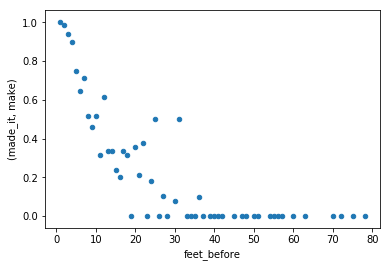

In [42]:
putt_stats.plot(kind='scatter', x='feet_before', y=('made_it', 'make'))

In [50]:
putts.iloc[0]

round_date            2016-11-18 00:00:00
round_no                                2
hole_no                                13
shot_no                                 2
left_to_pin_before                    360
left_to_pin_after                      12
score                                   3
par                                     3
direction                           short
made_it                             False
feet_before                            30
feet_after                              1
putts_needed                            2
Name: 1, dtype: object

In [65]:
# misreads / bad putts

g = putts.groupby('round_date')

miss_summary = g['feet_after'].agg({
    'putts': len,
    'miss_gt_4': lambda x: (x >= 4).sum(),
    'miss_gt_6': lambda x: (x >= 6).sum(),
})

miss_summary.head(10)

,putts,miss_gt_4,miss_gt_6
round_date,,,
2016-06-23,30.0,1.0,1.0
2016-06-24,30.0,1.0,1.0
2016-06-25,26.0,1.0,0.0
2016-06-26,25.0,2.0,1.0
2016-06-30,33.0,3.0,0.0
2016-07-01,34.0,2.0,1.0
2016-07-07,30.0,3.0,2.0
2016-07-08,32.0,2.0,1.0
2016-08-18,31.0,5.0,0.0


In [66]:
miss_summary.describe()

,putts,miss_gt_4,miss_gt_6
count,49.000000,49.000000,49.000000
mean,28.346939,1.204082,0.510204
std,2.194226,1.172241,0.710705
min,23.000000,0.000000,0.000000
25%,27.000000,0.000000,0.000000
50%,28.000000,1.000000,0.000000
75%,30.000000,2.000000,1.000000
max,34.000000,5.000000,2.000000


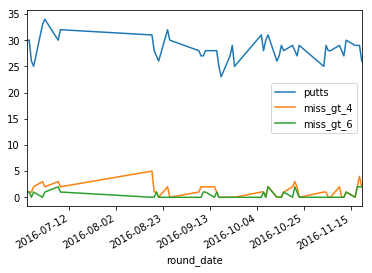

In [67]:
miss_summary.plot()

In [82]:
# misses under 10 feet

miss_lt_10 = putts.query('feet_before <= 10 & made_it == False').copy()

miss_lt_10.groupby('direction').size().sort_values(ascending=False)

direction
right         53
left          43
long right     9
long left      3
short left     2
short          1
dtype: int64

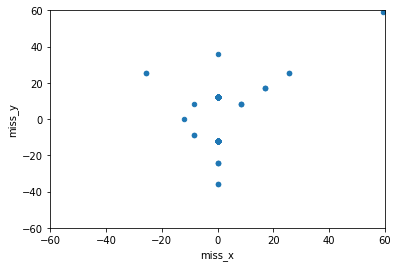

In [125]:
# plot misses

directions = {
    'long': [0, 1],
    'long right': [1, 1],
    'right': [0, 1],
    'short right': [1, -1],
    'short': [-1, 0],
    'short left': [-1, -1],
    'left': [0, -1],
    'long left': [-1, 1],
}

def make_coord(row):
    pt, inches = directions[row['direction']], row['left_to_pin_after']
    is_diagonal = pt[0] != 0 and pt[1] != 0
    pt = [p * inches / (sqrt(2) if is_diagonal else 1) for p in pt]
    return pd.Series(pt)


miss_lt_10[['miss_x', 'miss_y']] = miss_lt_10.apply(make_coord, axis=1)

miss_lt_10 \
    .query('left_to_pin_after < 300') \
    .plot(kind='scatter', x='miss_x', y='miss_y', xlim=(-60, 60), ylim=(-60, 60))